In [4]:
import pandas as pd
year = 2022
url = f"https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value={year}"
table_list = pd.read_html(url)
# table_list
df = table_list[0]
df.head()

,Date,20 YR,30 YR,Extrapolation Factor,8 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,52 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.1,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,01/03/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.06,0.08,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.05,2.01
1,01/04/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.05,0.08,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07
2,01/05/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.06,0.09,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
3,01/06/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.05,0.10,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
4,01/07/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.05,0.10,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11


In [5]:
df.columns

Index(['Date', '20 YR', '30 YR', 'Extrapolation Factor',
       '8 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT', '52 WEEKS BANK DISCOUNT',
       'COUPON EQUIVALENT.1', '1 Mo', '2 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr',
       '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr'],
      dtype='object')

In [6]:
# df['Date'] = pd.to_datetime(df['Date'])

In [7]:
# df

In [8]:
# df = df.drop(['20 YR', '30 YR', 'Extrapolation Factor',
#        '8 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT', '52 WEEKS BANK DISCOUNT',
#        'COUPON EQUIVALENT.1'],axis=1)

In [9]:
# df

In [10]:
# df=df.set_index('Date')
# df

In [11]:
def clean_df(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    df = df.drop(['20 YR', '30 YR', 'Extrapolation Factor',
       '8 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT', '52 WEEKS BANK DISCOUNT',
       'COUPON EQUIVALENT.1','2 Mo'],axis=1)
    return df

In [12]:
df = clean_df(df)

In [13]:
df

,1 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,
2022-01-03,0.05,0.08,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.05,2.01
2022-01-04,0.06,0.08,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07
2022-01-05,0.05,0.09,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
2022-01-06,0.04,0.10,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
2022-01-07,0.05,0.10,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-21,2.15,2.48,3.00,3.11,3.10,3.07,3.00,2.99,2.91,3.33,3.08
2022-07-22,2.15,2.49,2.97,3.01,2.98,2.93,2.87,2.85,2.77,3.23,3.00
2022-07-25,2.14,2.62,3.06,3.07,3.00,2.98,2.89,2.89,2.81,3.28,3.04


In [14]:
import seaborn as sns

<AxesSubplot:ylabel='Date'>

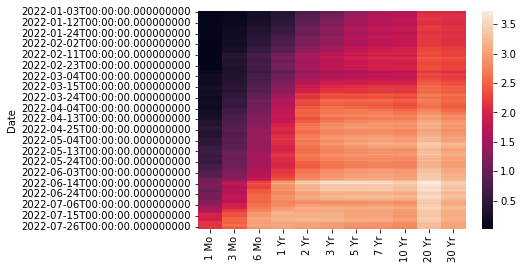

In [15]:
sns.heatmap(df)

In [16]:
for year in range(2010,2021):
    url = f"https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value={year}"
    table_list = pd.read_html(url)
    df = pd.concat([df,clean_df(table_list[0])]) 

In [17]:
df

,1 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,
2022-01-03,0.05,0.08,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.05,2.01
2022-01-04,0.06,0.08,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07
2022-01-05,0.05,0.09,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
2022-01-06,0.04,0.10,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
2022-01-07,0.05,0.10,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.09,0.09,0.09,0.10,0.13,0.17,0.37,0.66,0.94,1.46,1.66
2020-12-28,0.09,0.11,0.11,0.11,0.13,0.17,0.38,0.65,0.94,1.46,1.67
2020-12-29,0.08,0.10,0.12,0.11,0.12,0.17,0.37,0.66,0.94,1.47,1.67


In [18]:
df = df.sort_index()

In [19]:
df

,1 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,
2010-01-04,0.05,0.08,0.18,0.45,1.09,1.66,2.65,3.36,3.85,4.60,4.65
2010-01-05,0.03,0.07,0.17,0.41,1.01,1.57,2.56,3.28,3.77,4.54,4.59
2010-01-06,0.03,0.06,0.15,0.40,1.01,1.60,2.60,3.33,3.85,4.63,4.70
2010-01-07,0.02,0.05,0.16,0.40,1.03,1.62,2.62,3.33,3.85,4.62,4.69
2010-01-08,0.02,0.05,0.15,0.37,0.96,1.56,2.57,3.31,3.83,4.61,4.70
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-21,2.15,2.48,3.00,3.11,3.10,3.07,3.00,2.99,2.91,3.33,3.08
2022-07-22,2.15,2.49,2.97,3.01,2.98,2.93,2.87,2.85,2.77,3.23,3.00
2022-07-25,2.14,2.62,3.06,3.07,3.00,2.98,2.89,2.89,2.81,3.28,3.04


In [25]:
import plotly.graph_objects as go
import plotly.offline as pyo
import pandas as pd
import numpy as np

pyo.init_notebook_mode(connected=True)

In [ ]:
!jupyter labextension install jupyterlab-plotly@5.9.0
# !jupyter labextension list


Building jupyterlab assets (production, minimized)
/

In [27]:
x = df.columns
y = df.index
z = df.to_numpy()

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Yield Curves',
                  scene = {"aspectratio": {"x": 1, "y": 1, "z": 0.4}})
fig.show()
fig.savefig("Surface.png", bbox_inches="tight")

AttributeError: 'Figure' object has no attribute 'savefig'